In [ ]:
#@title splitting root_validation to validation and test
#data spliting in new folders
import os
import numpy as np
import shutil
import random

# # Creating Train / Val folders (One time use)
root_dir = '/content/data_augmentation/root_validation'
classes_dir = ['/melanoma', '/not_melanoma']

test_ratio = 0.30

for cls in classes_dir:    

    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    val_FileNames, test_FileNames= np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - test_ratio))])


    val_FileNames = [src+'/'+ name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('val: ', len(val_FileNames))
    print('test: ', len(test_FileNames))

 # Copy-pasting images
    for name in val_FileNames:
        shutil.copy(name, '/content/data_augmentation/validation' + cls)

    for name in test_FileNames:
        shutil.copy(name, '/content/data_augmentation/test' + cls)
   

Total images:  28
val:  19
test:  9
Total images:  54
val:  37
test:  17


In [ ]:
!pip install --upgrade wandb

     |████████████████████████████████| 1.8MB 9.0MB/s 
     |████████████████████████████████| 174kB 56.3MB/s 
     |████████████████████████████████| 133kB 48.9MB/s 
     |████████████████████████████████| 102kB 13.2MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=6affbf95142c6f8430e9c5f95ccd666c821f06344e3a3b3f41e2fe92e1dfce87
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=6f41135419f29b47e9cfad8cd808b30f0a4e0d54cd131510b39b1efc57638ebc
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
!gdown --id 1zoJp9Z19qRflaTiZ3Osnj6EXI_9YK_O1



#1-5iThilGeWEc00S3WOyGgupYwJS0EsbN        data without any thing hhhhhhhhh

#https://drive.google.com/file/d/1zoJp9Z19qRflaTiZ3Osnj6EXI_9YK_O1/view?usp=sharing   Aug_data & preprocessing

#https://drive.google.com/file/d/1U5WvGLhki5Tjot8O7hGCoWOzJQiEt6oa/view?usp=sharing      TTV2_Aug_data

#https://drive.google.com/file/d/1QaSpkDcwcV4wfEUwDOdbcr-BpDgQGEJu/view?usp=sharing      TTV_Aug_data

#https://drive.google.com/file/d/1lgLRU4jGo9PryAJ7hruVMO5FgaLIh9Hr/view?usp=sharing      1lgLRU4jGo9PryAJ7hruVMO5FgaLIh9Hr      Aug_data

Downloading...
From: https://drive.google.com/uc?id=1zoJp9Z19qRflaTiZ3Osnj6EXI_9YK_O1
To: /content/Preprocessed_Dataset.rar
268MB [00:02, 109MB/s]


In [ ]:
#unzip folder
#!unzip All_resized_data.zip

!unrar x Preprocessed_Dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Preprocessed_Dataset.rar

Creating    Preprocessed Dataset                                      OK
Creating    Preprocessed Dataset/test                                 OK
Creating    Preprocessed Dataset/test/melanoma                        OK
Extracting  Preprocessed Dataset/test/melanoma/melanoma25.PNG              0%  OK 
Extracting  Preprocessed Dataset/test/melanoma/melanoma27.PNG              0%  OK 
Creating    Preprocessed Dataset/test/not_melanoma                    OK
Extracting  Preprocessed Dataset/test/not_melanoma/Not_melanoma3.PNG       0%  OK 
Extracting  Preprocessed Dataset/test/not_melanoma/Not_melanoma9.PNG       0%  OK 
Creating    Preprocessed Dataset/train                                OK
Creating    Preprocessed Dataset/train/melanoma                       OK
Extracting  Preprocessed Dataset/train/melanoma/melanoma0.PNG              0%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wandb login 7b9915da4df7b6c87aeeb2856ef39970ca494306

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb

from wandb.fastai import WandbCallback
wandb.init(project="clear2_vgg_16")

wandb: Currently logged in as: hagermohamed (use `wandb login --relogin` to force relogin)


In [ ]:
from fastai import *
from fastai.vision import *
#from torchvision import transforms
from imutils import paths
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
import argparse
import cv2
import os
from torch import optim
import shutil
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import glob

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from torchvision import models


#import torch 
#import torch.nn as nn
#import torchvision
#import torchvision.transforms as transforms
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image
# Useful for examining network
from torchsummary import summary
# Timing utility
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
base_dir = '/content/Preprocessed_Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Directory with our training cat pictures
train_melanoma_dir = os.path.join(train_dir, 'melanoma')

# Directory with our training dog pictures
train_not_melanoma_dir = os.path.join(train_dir, 'not_melanoma')

# Directory with our validation cat pictures
validation_melanoma_dir = os.path.join(validation_dir, 'melanoma')

# Directory with our validation dog pictures
validation_not_melanoma_dir = os.path.join(validation_dir, 'not_melanoma')

# Directory with our validation cat pictures
test_melanoma_dir = os.path.join(test_dir, 'melanoma')

# Directory with our validation dog pictures
test_not_melanoma_dir = os.path.join(test_dir, 'not_melanoma')

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Note that the test data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2585 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
len(train_generator[18])

2

In [ ]:
recall = Recall()
presc = Precision()

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.005)

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

x = layers.Dense(256, activation='relu')(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)





In [ ]:
from datetime import datetime
import pytz

timezone = pytz.timezone('Africa/Cairo') 
current_time = datetime.now(timezone).strftime("%H-%M-%S")
file_name = 'vgg16_finetune-'+current_time+'.h15'

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=10, verbose=1, mode='min', min_lr=5e-5)
checkpoint = ModelCheckpoint(file_name, monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

callbacks=[lr_reduce,checkpoint]

In [ ]:

model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['acc'])


In [ ]:
steps_per_epoch = 2585//20 #20 for batch_size

In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = steps_per_epoch, epochs = 50, callbacks=callbacks)

Epoch 1/50
129/129 [==============================] - 23s 130ms/step - loss: 2.4140 - acc: 0.6717 - val_loss: 0.4151 - val_acc: 0.8795

Epoch 00001: val_loss improved from inf to 0.41514, saving model to vgg16_finetune-04-22-48.h15
INFO:tensorflow:Assets written to: vgg16_finetune-04-22-48.h15/assets
Epoch 2/50
129/129 [==============================] - 14s 109ms/step - loss: 0.4374 - acc: 0.8117 - val_loss: 0.2752 - val_acc: 0.9157

Epoch 00002: val_loss improved from 0.41514 to 0.27519, saving model to vgg16_finetune-04-22-48.h15
INFO:tensorflow:Assets written to: vgg16_finetune-04-22-48.h15/assets
Epoch 3/50
129/129 [==============================] - 15s 112ms/step - loss: 0.3529 - acc: 0.8526 - val_loss: 0.3432 - val_acc: 0.9036

Epoch 00003: val_loss did not improve from 0.27519
Epoch 4/50
129/129 [==============================] - 15s 113ms/step - loss: 0.3583 - acc: 0.8433 - val_loss: 0.2832 - val_acc: 0.8916

Epoch 00004: val_loss did not improve from 0.27519
Epoch 5/50
129/129

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Epochs ')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Loss Curves')

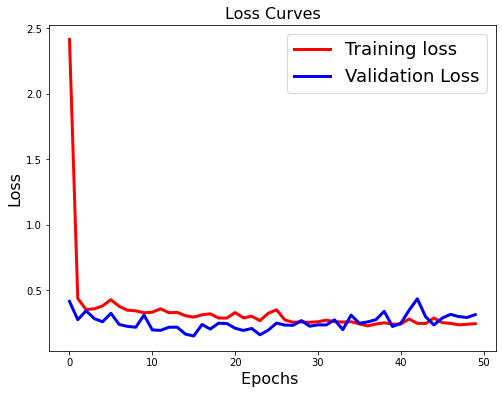

In [ ]:
plt.figure(figsize=[8,6])

plt.plot(vgghist.history['loss'],'r',linewidth=3.0)

plt.plot(vgghist.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Epochs ')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy Curves')

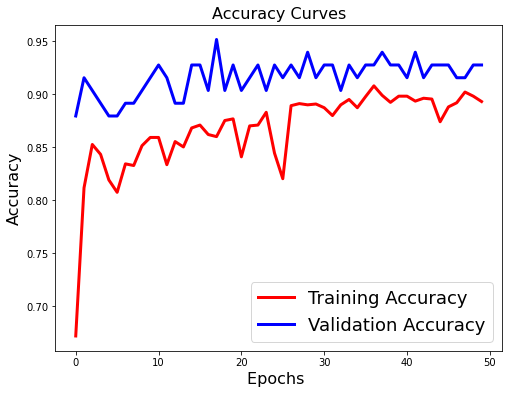

In [ ]:
plt.figure(figsize=[8,6])

plt.plot(vgghist.history['acc'],'r',linewidth=3.0)

plt.plot(vgghist.history['val_acc'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model_save_file = "TTV2_VGG16_9.hdf5"
model.save(model_save_file)

In [ ]:
!mv TTV2_VGG16_9.hdf5 drive/MyDrive/melenoma_drive_data/saving_models

mv: cannot move 'TTV2_VGG16_9.hdf5' to 'drive/MyDrive/melenoma_drive_data/saving_models': No such file or directory


In [ ]:
Y_pred = model.predict_generator(test_generator)

In [ ]:
Y_pred

array([[5.264128e-05],
       [9.999883e-01],
       [9.999959e-01],
       [2.232826e-02]], dtype=float32)